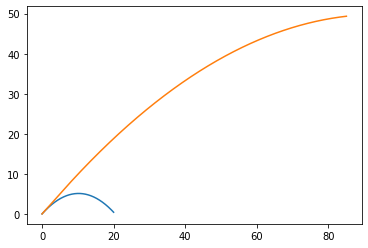

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
MODEL_G = 9.8
MODEL_DM = 0.1
MODEL_DT = 0.001
MODEL_DU = 30
class Body:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.trajectory_x = []
        self.trajectory_y = []
    def advance(self):
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT
class Rocket(Body):
    def __init__(self,vx, vy, x, y, m):
        self.m = m
        super().__init__(x, y, 10, 10)

    def advance(self):
        if self.m >= 20:
            self.trajectory_x.append(self.x)
            self.trajectory_y.append(self.y)
            self.m -= MODEL_DM
            v = (self.vx**2 +self.vy**2)**0.5
            dv = MODEL_DU * MODEL_DM / self.m
            self.vx += dv * self.vx / v
            self.vy += dv * self.vy / v
            self.x += self.vx * MODEL_DT 
            self.y += self.vy * MODEL_DT 
        else:
            self.trajectory_x.append(self.x)
            self.trajectory_y.append(self.y)

            self.x += self.vx * MODEL_DT
            self.y += self.vy * MODEL_DT
            self.vy -= MODEL_G * MODEL_DT
            
kamen = Body(0, 0, 10, 10)
Vostok = Rocket (10, 10, 0,  0, 50)

for i in np.r_[0:2:MODEL_DT]:
    kamen.advance()
for i in np.r_[0:3:MODEL_DT]:
    Vostok.advance()    
plt.plot(kamen.trajectory_x, kamen.trajectory_y)
plt.plot(Vostok.trajectory_x, Vostok.trajectory_y)